In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("28-urban_pedestrian_locations_with_labels.csv")

In [4]:
df.head()

,x_position,y_position,true_cluster
0,0.830586,-0.447733,1
1,0.701678,0.816918,0
2,1.022080,-0.492571,1
3,-0.316765,0.953438,0
4,0.293226,1.057185,0


<Axes: xlabel='x_position', ylabel='y_position'>

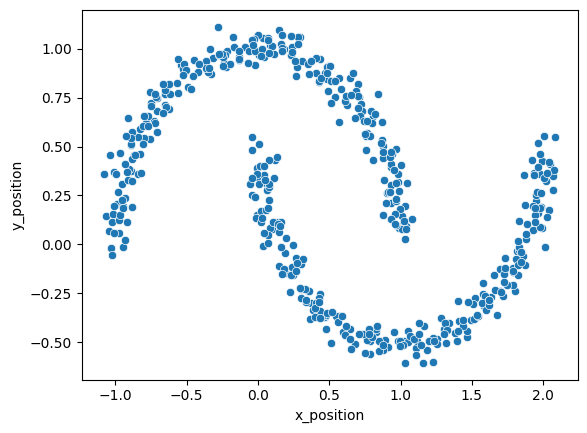

In [6]:
sns.scatterplot(data = df, x = "x_position", y = "y_position")


In [7]:
df = df.drop("true_cluster", axis=1)

In [8]:
df.head()

,x_position,y_position
0,0.830586,-0.447733
1,0.701678,0.816918
2,1.022080,-0.492571
3,-0.316765,0.953438
4,0.293226,1.057185


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x_position  500 non-null    float64
 1   y_position  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_scaled = scaler.fit_transform(df)

In [13]:
from sklearn.cluster import DBSCAN

In [14]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [16]:
dbscan.fit(X_scaled)

,eps,0.5
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [17]:
X_scaled = pd.DataFrame(X_scaled, columns=["x_position", "y_position"])

<Axes: xlabel='x_position', ylabel='y_position'>

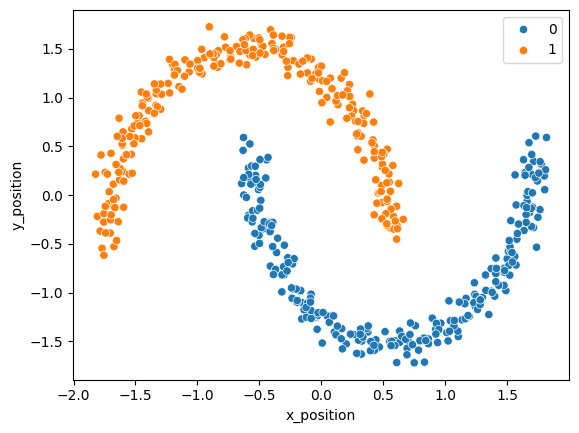

In [18]:
sns.scatterplot(data=X_scaled, x="x_position", y="y_position", hue=dbscan.labels_)

In [19]:
eps_values = [0.1,0.2, 0.3, 0.4, 0.5, 0.6]
min_samples_values = [4,5,6]

In [20]:
from sklearn.metrics import silhouette_score

In [31]:
results = []
for eps in eps_values:
    for min_sample in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(X_scaled)
        labels = dbscan.labels_

        if len(set(labels)) <= 1:
            continue
        sil = silhouette_score(X_scaled, labels)
        results.append({
            "eps": eps,
            "min_samples": min_sample,
            "silhouette_score": sil,
            "number_of_clusters": len(set(labels)) - (1 if -1 in labels else 0)
        })
results_df = pd.DataFrame(results)
results_df = results_df.sort_values("silhouette_score", ascending=False)


In [32]:
results_df

,eps,min_samples,silhouette_score,number_of_clusters
9,0.4,4,0.389338,2
10,0.4,5,0.389338,2
16,0.6,5,0.389338,2
15,0.6,4,0.389338,2
14,0.5,6,0.389338,2
13,0.5,5,0.389338,2
12,0.5,4,0.389338,2
11,0.4,6,0.389338,2
17,0.6,6,0.389338,2
8,0.3,6,0.389338,2


In [33]:
from sklearn.cluster import HDBSCAN

In [34]:
hdbscan = HDBSCAN()
hdbscan.fit(X_scaled)


,min_cluster_size,5
,min_samples,None
,cluster_selection_epsilon,0.0
,max_cluster_size,None
,metric,'euclidean'
,metric_params,None
,alpha,1.0
,algorithm,'auto'
,leaf_size,40
,n_jobs,None
,cluster_selection_method,'eom'


<Axes: xlabel='x_position', ylabel='y_position'>

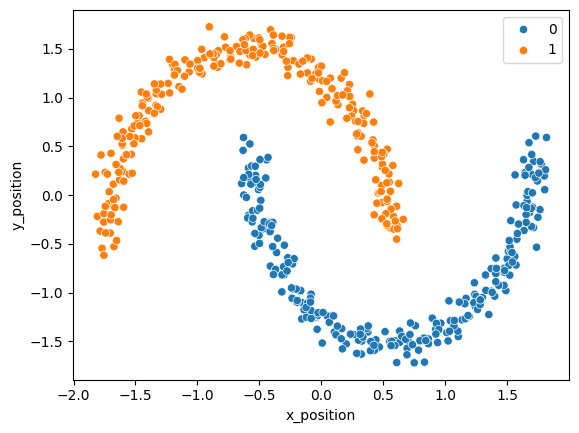

In [35]:
sns.scatterplot(data=X_scaled, x="x_position", y="y_position", hue=hdbscan.labels_)

In [36]:
min_cluster_size =[3,5,7,10]
min_samples = [None, 3,5,7]

In [38]:
results = []
for min_cluster in min_cluster_size:
    for min_sample in min_samples:
        hdbscan = HDBSCAN(min_cluster_size=min_cluster, min_samples=min_sample)
        hdbscan.fit(X_scaled)
        labels = hdbscan.labels_

        if len(set(labels)) <= 1:
            continue
        sil = silhouette_score(X_scaled, labels)
        results.append({
            "min_cluster_size": min_cluster,
            "min_samples": min_sample,
            "silhouette_score": sil,
            "number_of_clusters": len(set(labels)) - (1 if -1 in labels else 0)
        })
results_df = pd.DataFrame(results)
results_df = results_df.sort_values("silhouette_score", ascending=False)


In [40]:
results_df

,min_cluster_size,min_samples,silhouette_score,number_of_clusters
2,3,5.0,0.389338,2
3,3,7.0,0.389338,2
4,5,NaN,0.389338,2
5,5,3.0,0.389338,2
6,5,5.0,0.389338,2
7,5,7.0,0.389338,2
8,7,NaN,0.389338,2
9,7,3.0,0.389338,2
10,7,5.0,0.389338,2
11,7,7.0,0.389338,2
